In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
data = pd.read_csv(r"C:\Users\shamaun\Desktop\Datasets\Churn_Modelling.csv")

In [13]:
data2 = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

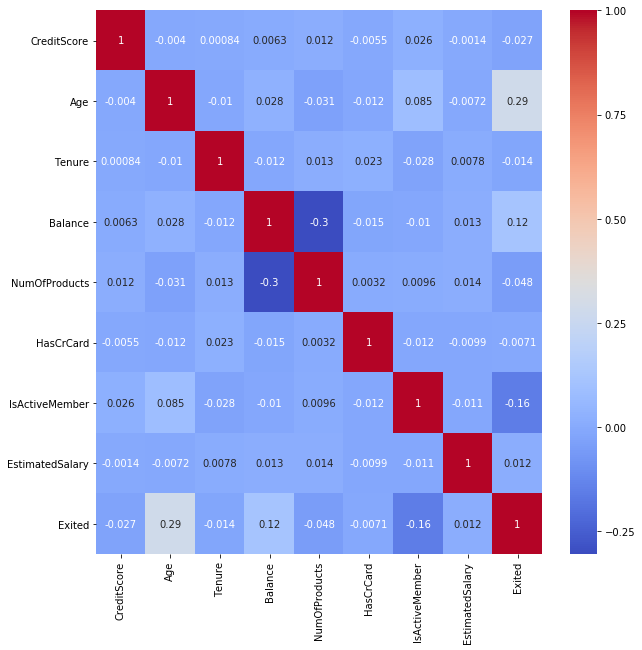

In [14]:
corr = data2.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.show()

In [15]:
ip = data2.drop(['Exited'],axis=1)
op = data2['Exited']

In [16]:
ip.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [19]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
ip.Gender = le1.fit_transform(ip.Gender)

le2 = LabelEncoder()
ip.Geography = le2.fit_transform(ip.Geography)

In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[1,2])
ip = ohe.fit_transform(ip).toarray()

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [21]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(ip,op,test_size=0.2)

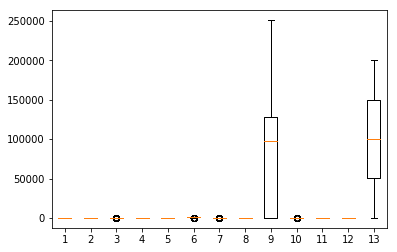

In [23]:
plt.boxplot(xtr)
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtr)

xtr = sc.transform(xtr)
xts = sc.transform(xts)

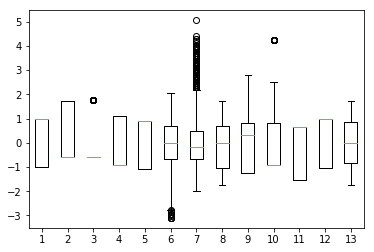

In [25]:
plt.boxplot(xtr)
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtr,ytr)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(xts)
print(confusion_matrix(yts,y_pred))

[[1535   71]
 [ 296   98]]


In [28]:
model.score(xts,yts)

0.8165